In [1]:
from platform import python_version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# seed
RANDOM_STATE = 1776

# set seaborn theme
sns.set_theme()

# print versions
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Matplotlib Version: " + plt.matplotlib.__version__)
print("Python Version: " + python_version())

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

# import user functions
import UserFunctions as uf

Numpy Version: 1.26.4
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
Matplotlib Version: 3.9.2
Python Version: 3.9.20


### Import Data

In [2]:
# full dataframe
df = pd.read_pickle("../Data/CleanFullLabelsML.pkl")

# data dictionary
df_dict = pd.read_pickle("../Data/FinalcolumnDefinitionML.pkl")

# data label
df_label = pd.read_pickle("../Data/colLabelML.pkl") 

# boolean
df_bool = pd.read_pickle("../Data/colBooleanML.pkl")

# nominal
df_nominal = pd.read_pickle("../Data/colNominalML.pkl")

# ordinal
df_ordinal = pd.read_pickle("../Data/colOrdinalML.pkl")

# numeric
df_numeric = pd.read_pickle("../Data/colNumericML.pkl")

# checking for duplicated column name
df.columns[df.columns.duplicated()]

Index([], dtype='object')

#### Data Shape

In [3]:
# df DataFrame
print(f"Orginal Data file Shape: {df.shape}")
print(f"Label(s) Data rows: {len(df_label)}")
print(f"Boolean(s) Data rows: {len(df_bool)}")
print(f"Ordinal(s) Data rows: {len(df_ordinal)}")
print(f"Nominal(s) Data rows: {len(df_nominal)}")
print(f"Numeric(s) Data rows: {len(df_numeric)}")

Orginal Data file Shape: (14856, 121)
Label(s) Data rows: 13
Boolean(s) Data rows: 9
Ordinal(s) Data rows: 15
Nominal(s) Data rows: 79
Numeric(s) Data rows: 18


In [4]:
# display NaNs
DFNaN = uf.percentageNull(df)

# display
DFNaN.head(15)

,percentage,NaNCount


In [5]:
df_label

,label
0,FollowUpFunctionalStatus_CAN
1,AirwayDehiscencePostTransplant_CAN
2,AcuteRejectionEpisode_CAN
3,StrokePostTransplant_CAN
4,PacemakerPostTransplant_CAN
5,GraftFailed_CAN
6,LastFollowupNumber_CAN
7,TransplantStatus_CAN
8,TransplantSurvivalDay_CAN
9,RecipientStatus_CAN


In [6]:
# select label for classification
removeCol = df_label.label.to_list()

# remove GraftFailed_CAN
removeCol.remove('TransplantStatus_CAN')
removeCol.remove('TransplantSurvivalDay_CAN')

# remove unwanted features
df, df_bool, df_ordinal, df_nominal, df_numeric = uf.removeHouseKeeping(df, removeCol, df_bool, df_ordinal, df_nominal, df_numeric)

# features names to list
boolCol = df_bool.boolean.to_list()
nominalCol = df_nominal.nominal.to_list()
ordinalCol = df_ordinal.ordinal.to_list()
numericCol = df_numeric.numeric.to_list()

Remove row(s) from df_boolean DataFrame.
Remove row(s) from df_ordinal DataFrame.
Remove row(s) from df_nominal DataFrame.
Remove row(s) from df_numeric DataFrame.

Removed Features:['FollowUpFunctionalStatus_CAN', 'AirwayDehiscencePostTransplant_CAN', 'AcuteRejectionEpisode_CAN', 'StrokePostTransplant_CAN', 'PacemakerPostTransplant_CAN', 'GraftFailed_CAN', 'LastFollowupNumber_CAN', 'RecipientStatus_CAN', 'RejectionTreatmentWithinOneYear_CAN', 'GraftStatus_CAN', 'LengthOfStay_CAN']

Total rows before: 14,856 & columns: 121
Total rows after: 14,856 & columns: 110


In [7]:
# df DataFrame
print(f"Orginal Data file Shape: {df.shape}")
print(f"Boolean(s) Data rows: {len(boolCol)}")
print(f"Ordinal(s) Data rows: {len(ordinalCol)}")
print(f"Nominal(s) Data rows: {len(nominalCol)}")
print(f"Numeric(s) Data rows: {len(numericCol)}")
print("\nTotal Length of Features:", len(boolCol) + len(ordinalCol) + len(nominalCol) + len(numericCol))

Orginal Data file Shape: (14856, 110)
Boolean(s) Data rows: 9
Ordinal(s) Data rows: 15
Nominal(s) Data rows: 69
Numeric(s) Data rows: 17

Total Length of Features: 110


#### Encode

In [8]:
print(sorted(nominalCol))

['AntibodyResultHBSAB_DON', 'Antibody_HEP_C_DON', 'Antihypertensive_DON', 'ArginnieManagement_DON', 'AtTransplantSurfaceHBVAntibodyTotal_CAN', 'Biopsy_DON', 'Bronchoscopy_DON_Combined', 'CMVStatusAtTransplant_CAN', 'Cancer_DON_Combined', 'CardiacArrest_DON', 'CerebrovascularDisease_CAN', 'ChestXray_DON', 'ChronicSteroidsUse_CAN', 'CigaretteHistory_DON', 'CigaretteUse_CAN', 'ClinicalInfection_DON', 'CocaineUse_DON', 'CoronaryAngiogram_DON', 'CrossMatch', 'DeathMechanism_DON', 'DeceasedRetyped_DON', 'DefibrillatorImplant_CAN', 'Diabetes_CAN', 'DiagnosisType_CAN', 'DialysisAfterList_CAN', 'Diuretics_DON', 'EpsteinBarrStatusTransplant_CAN', 'EpsteinBarr_DON_Combined', 'HeartProcedureType_CAN', 'HeavyAlcoholUse_DON', 'HeparinManagement_DON', 'Hepatitis_B_CoreAntibody_CAN', 'Hepatitis_B_CoreAntibody_DON', 'Hypertension_DON', 'InfectionTherapyIV_CAN', 'InotropicMedication_DON', 'InsulinManagement_DON', 'IntropesVasodilators_CAN_Combined', 'LV_EjectionFractionMedthod_DON', 'LifeSupport_CAN_Com

In [9]:
df[nominalCol].head()

,Transfusion_CAN,Result_RPR_VDRL_DON,SerologyAntiCMV_DON,ArginnieManagement_DON,Diuretics_DON,HeartProcedureType_CAN,InfectionTherapyIV_CAN,EpsteinBarrStatusTransplant_CAN,Thyroxine_T4_DON,AntibodyResultHBSAB_DON,CardiacArrest_DON,Antibody_HEP_C_DON,LV_EjectionFractionMedthod_DON,SurfaceAntigenHEP_B_CAN,AtTransplantSurfaceHBVAntibodyTotal_CAN,Hepatitis_B_CoreAntibody_DON,Hepatitis_B_CoreAntibody_CAN,DiagnosisType_CAN,TransplantSerostatusHIV_CAN,SurfaceAntigenHEP_B_DON,Triiodothyronine_T3_DON,CocaineUse_DON,PanelReactiveAntibody_CPRA_CAN,PastOtherDrugUse_DON,HeavyAlcoholUse_DON,SteroidsUse_DON,CerebrovascularDisease_CAN,Tatoos_DON,PastCocaineUse_DON,Diabetes_CAN,CigaretteUse_CAN,OtherDrugUse_DON,Biopsy_DON,ChronicSteroidsUse_CAN,SerostatusStatus_HEP_C_CAN,HeparinManagement_DON,InsulinManagement_DON,ClinicalInfection_DON,CMVStatusAtTransplant_CAN,NonHeartBeating_DON,UrinePortein_DON,DefibrillatorImplant_CAN,DeathMechanism_DON,TransfusionNumber_DON,SynthicAntiDiureticHormone_DON,Vasodilator_DON,InotropicMedication_DON,PriorCardiacSurgery_CAN,DeceasedRetyped_DON,CoronaryAngiogram_DON,PriorLungSurgery_CAN,PulmCath_DON,OtherInfectionSource_DON,Antihypertensive_DON,RiskHIV_DON,CrossMatch,MyocardialInfarction_DON,Hypertension_DON,PreviousMalignancy_CAN,CigaretteHistory_DON,DialysisAfterList_CAN,ChestXray_DON,Bronchoscopy_DON_Combined,Cancer_DON_Combined,EpsteinBarr_DON_Combined,IntropesVasodilators_CAN_Combined,LifeSupport_CAN_Combined,PreTranspantNAT_CAN_Combined,ResultNAT_DON_Combined
0,Y,Negative,Positive,Y,Y,Orthotopic Bicaval,N,Positive,N,Unknown,N,Negative,Echo,Negative,Negative,Negative,Negative,DILATED MYOPATHY,Negative,Negative,N,U,Low Sensitization,Y,N,Y,N,Y,N,Yes,Y,Y,Needle,N,Negative,Y,N,Y,Positive,N,N,Y,GUNSHOT WOUND,NONE,N,N,N,N,N,Unknown,N,N,0,N,N,Y,N,N,N,N,N,Abnormal,Abnormal,No,Positive,No,Yes,Unknown,Negative
1,N,Negative,Positive,N,Y,Orthotopic Traditional,Y,Positive,N,Unknown,N,Negative,Echo,Negative,Negative,Negative,Negative,DILATED MYOPATHY,Negative,Negative,N,N,Some Sensitization,N,N,Y,N,Y,Y,No,N,U,Needle,N,Negative,N,Y,Y,Positive,N,N,Y,CARDIOVASCULAR,NONE,N,Y,N,N,N,Normal,N,N,0,Y,N,Y,N,N,N,N,N,Normal,Normal,No,Positive,No,Yes,Unknown,Negative
2,N,Negative,Positive,Y,Y,Orthotopic Bicaval,N,Positive,N,Unknown,N,Negative,Echo,Negative,Negative,Negative,Negative,DILATED MYOPATHY,Negative,Negative,N,U,Some Sensitization,N,N,Y,N,N,N,No,N,U,Needle,N,Negative,Y,Y,Y,Positive,N,N,Y,DRUG INTOXICATION,1 - 5,N,Y,N,Y,Y,Normal,N,N,0,Y,N,Y,N,N,N,N,N,Abnormal,Normal,No,Unknown,No,Yes,Unknown,Negative
3,N,Negative,Positive,N,Y,Orthotopic Bicaval,N,Positive,Y,Negative,N,Negative,Echo,Negative,Negative,Negative,Negative,DILATED MYOPATHY,Negative,Negative,N,U,Unknown,N,N,Y,N,N,N,No,Y,U,Needle,N,Negative,Y,Y,Y,Positive,N,Y,Y,INTRACRANIAL HEMORRHAGE/STROKE,6 - 10,N,N,Y,N,Y,Normal,N,N,0,N,N,Y,N,Y,N,N,N,Abnormal,Unknown,No,Positive,Yes,Yes,Unknown,Negative
4,N,Negative,Positive,Y,Y,Orthotopic Bicaval,N,Positive,Y,Unknown,N,Negative,Echo,Negative,Negative,Negative,Negative,DILATED MYOPATHY,Negative,Negative,N,U,No Sensitization,N,N,Y,N,N,N,No,Y,U,Needle,N,Negative,Y,N,Y,Negative,N,N,N,INTRACRANIAL HEMORRHAGE/STROKE,NONE,N,Y,N,Y,N,Unknown,N,N,0,Y,N,Y,N,N,N,N,N,Abnormal,Unknown,No,Positive,No,Yes,Unknown,Negative


In [10]:
df[['TransplantSurvivalDay_CAN','TransplantStatus_CAN']].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransplantSurvivalDay_CAN,14856.0,NaN,NaN,NaN,634.23371,473.942355,0.0,194.0,606.0,1084.0,1799.0
TransplantStatus_CAN,14856,2,False,13005,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Determine Candidate Survival for 600 Days

In [11]:
# create new feature
df['Survival'] = df.TransplantSurvivalDay_CAN >= 600

# drop features
df = df.drop(columns=['TransplantSurvivalDay_CAN','TransplantStatus_CAN'])

# shape
df.shape

(14856, 109)

#### Split Testing & Validation & Training

In [12]:
# encode/split dataset
X, y, X_train, X_test, X_val, y_train, y_val, y_test = uf.EncodeDummyTrainValTest(df, 'Survival', nominalCol, RANDOM_STATE)
# # encode/scale/split dataset
# X, y, X_train, X_test, X_val, y_train, y_val, y_test = uf.EncodeDummyScaleAllTrainValTest(df, 'Survival', nominalCol, RANDOM_STATE)

Training Dependent Shape: (9507, 204) & Label Shape: (9507,)
Validation Dependent Shape: (2377, 204) & Label Shape: (2377,)
Testing Dependent Shape: (2972, 204) & Label Shape: (2972,)


In [13]:
# find all boolean columns
boolean_columns = X_train.select_dtypes(include=bool).columns

# convert boolean to int
X_train[boolean_columns] = X_train[boolean_columns].astype(int)
X_val[boolean_columns] = X_val[boolean_columns].astype(int)
X_test[boolean_columns] = X_test[boolean_columns].astype(int)

In [14]:
X_train.head()

,PreviousTransplantNumber_CAN,EducationLevel_CAN,IntropesIV_CAN,TotalDayWaitList_CAN,Ventilator_CAN,PreTransplantMedicalCondition_CAN,MismatchLevel_LOCUS,MismatchLevel_B_LOCUS,MismatchLevel_DR_LOCUS,MismatchLevel_HLA,BloodInfectionSource_DON,BloodUreaNitrogenLevel_DON,PulmonaryInfection_DON,UrineInfection_DON,DiabetesHistory_DON,ResultHIV_NAT_DON,BloodGroupMatchLevel,IschemicTimeHours_DON,DistanceFrom_HospitaltoTXCenter,LV_EjectionFractionPercent_DON,KidneyAllocation_DON,PCO2_DON,BloodPH_DON,Hematocrit_DON,PF_Ratio_DON,Age_Difference,Creatinine_Difference,HeightCm_Difference,Hemodynamics_CAN_Addition,TotalBilirubin_Addition,WeightKg_Difference,Level_SGOT_DON_Mean,AntigenBW4_BW6_CAN_Addition,AntigenC1_C2_CAN_Addition,AntigenDQ1_DQ2_CAN_Addition,Total_AntigensDR_CAN,Total_AntigenHLA,Total_AntigenHist_DON,Gender_Difference,Transfusion_CAN_U,Transfusion_CAN_Y,Result_RPR_VDRL_DON_Positive,Result_RPR_VDRL_DON_Unknown,SerologyAntiCMV_DON_Negative,SerologyAntiCMV_DON_Positive,SerologyAntiCMV_DON_Unknown,ArginnieManagement_DON_U,ArginnieManagement_DON_Y,Diuretics_DON_U,Diuretics_DON_Y,HeartProcedureType_CAN_Orthotopic Bicaval,"HeartProcedureType_CAN_Orthotopic Total (Bicaval, PV)",HeartProcedureType_CAN_Orthotopic Traditional,HeartProcedureType_CAN_Unknown,InfectionTherapyIV_CAN_U,InfectionTherapyIV_CAN_Y,EpsteinBarrStatusTransplant_CAN_Positive,EpsteinBarrStatusTransplant_CAN_Unknown,Thyroxine_T4_DON_U,Thyroxine_T4_DON_Y,AntibodyResultHBSAB_DON_Positive,AntibodyResultHBSAB_DON_Unknown,CardiacArrest_DON_U,CardiacArrest_DON_Y,Antibody_HEP_C_DON_Positive,Antibody_HEP_C_DON_Unknown,LV_EjectionFractionMedthod_DON_Echo,LV_EjectionFractionMedthod_DON_Unknown,SurfaceAntigenHEP_B_CAN_Positive,SurfaceAntigenHEP_B_CAN_Unknown,AtTransplantSurfaceHBVAntibodyTotal_CAN_Positive,AtTransplantSurfaceHBVAntibodyTotal_CAN_Unknown,Hepatitis_B_CoreAntibody_DON_Negative,Hepatitis_B_CoreAntibody_DON_Positive,Hepatitis_B_CoreAntibody_DON_Unknown,Hepatitis_B_CoreAntibody_CAN_Positive,Hepatitis_B_CoreAntibody_CAN_Unknown,DiagnosisType_CAN_CANCER,DiagnosisType_CAN_CONGENITAL HEART DEFECT,DiagnosisType_CAN_CORONARY ARTERY DISEASE,DiagnosisType_CAN_DILATED MYOPATHY,DiagnosisType_CAN_HEART RE-TX/GF,DiagnosisType_CAN_HYPERTROPHIC CARDIOMYOPATHY,DiagnosisType_CAN_MUSCULAR DYSTROPHY,DiagnosisType_CAN_RESTRICTIVE MYOPATHY,DiagnosisType_CAN_Unknown,DiagnosisType_CAN_VALVULAR HEART DISEASE,TransplantSerostatusHIV_CAN_Positive,TransplantSerostatusHIV_CAN_Unknown,SurfaceAntigenHEP_B_DON_Positive,SurfaceAntigenHEP_B_DON_Unknown,Triiodothyronine_T3_DON_U,Triiodothyronine_T3_DON_Y,CocaineUse_DON_U,CocaineUse_DON_Y,PanelReactiveAntibody_CPRA_CAN_High Sensitization,PanelReactiveAntibody_CPRA_CAN_Low Sensitization,PanelReactiveAntibody_CPRA_CAN_Moderate Sensitization,PanelReactiveAntibody_CPRA_CAN_No Sensitization,PanelReactiveAntibody_CPRA_CAN_Some Sensitization,PanelReactiveAntibody_CPRA_CAN_Unknown,PastOtherDrugUse_DON_U,PastOtherDrugUse_DON_Y,HeavyAlcoholUse_DON_U,HeavyAlcoholUse_DON_Y,SteroidsUse_DON_U,SteroidsUse_DON_Y,CerebrovascularDisease_CAN_U,CerebrovascularDisease_CAN_Y,Tatoos_DON_U,Tatoos_DON_Y,PastCocaineUse_DON_U,PastCocaineUse_DON_Y,Diabetes_CAN_Unknown,Diabetes_CAN_Yes,CigaretteUse_CAN_U,CigaretteUse_CAN_Y,OtherDrugUse_DON_U,OtherDrugUse_DON_Y,Biopsy_DON_Needle,Biopsy_DON_Unknown,Biopsy_DON_Wedge,ChronicSteroidsUse_CAN_U,ChronicSteroidsUse_CAN_Y,SerostatusStatus_HEP_C_CAN_Positive,SerostatusStatus_HEP_C_CAN_Unknown,HeparinManagement_DON_U,HeparinManagement_DON_Y,InsulinManagement_DON_U,InsulinManagement_DON_Y,ClinicalInfection_DON_U,ClinicalInfection_DON_Y,CMVStatusAtTransplant_CAN_Positive,CMVStatusAtTransplant_CAN_Unknown,NonHeartBeating_DON_U,NonHeartBeating_DON_Y,UrinePortein_DON_U,UrinePortein_DON_Y,DefibrillatorImplant_CAN_U,DefibrillatorImplant_CAN_Y,DeathMechanism_DON_BLUNT INJURY,DeathMechanism_DON_CARDIOVASCULAR,DeathMechanism_DON_DEATH FROM NATURAL CAUSES,DeathMechanism_DON_DROWNING,DeathMechanism_DON_DRUG INTOXICATION,DeathMechanism_DON_ELECTRICAL,De

#### Identify Columns with LOW Variance

In [15]:
# identify and drop low variance columns
low_variance_cols = [col for col in X_train.columns if X_train[col].var() < 0.01]
print("Low Variance Columns:", low_variance_cols)

Low Variance Columns: ['ResultHIV_NAT_DON', 'BloodPH_DON', 'Transfusion_CAN_U', 'Result_RPR_VDRL_DON_Positive', 'Result_RPR_VDRL_DON_Unknown', 'SerologyAntiCMV_DON_Unknown', 'ArginnieManagement_DON_U', 'Diuretics_DON_U', 'HeartProcedureType_CAN_Unknown', 'InfectionTherapyIV_CAN_U', 'Thyroxine_T4_DON_U', 'Antibody_HEP_C_DON_Unknown', 'LV_EjectionFractionMedthod_DON_Unknown', 'Hepatitis_B_CoreAntibody_DON_Unknown', 'DiagnosisType_CAN_CANCER', 'DiagnosisType_CAN_MUSCULAR DYSTROPHY', 'DiagnosisType_CAN_VALVULAR HEART DISEASE', 'TransplantSerostatusHIV_CAN_Positive', 'SurfaceAntigenHEP_B_DON_Positive', 'SurfaceAntigenHEP_B_DON_Unknown', 'Triiodothyronine_T3_DON_U', 'Triiodothyronine_T3_DON_Y', 'SteroidsUse_DON_U', 'CerebrovascularDisease_CAN_U', 'Tatoos_DON_U', 'Diabetes_CAN_Unknown', 'CigaretteUse_CAN_U', 'Biopsy_DON_Needle', 'Biopsy_DON_Unknown', 'Biopsy_DON_Wedge', 'HeparinManagement_DON_U', 'InsulinManagement_DON_U', 'ClinicalInfection_DON_U', 'NonHeartBeating_DON_U', 'UrinePortein_DON_

In [16]:
# remove columns with Low Variance
X_train = X_train.drop(columns=low_variance_cols)
X_val = X_val.drop(columns=low_variance_cols)
X_test = X_test.drop(columns=low_variance_cols)

# display
X_train.shape, X_val.shape, X_test.shape

((9507, 150), (2377, 150), (2972, 150))

#### SelectKBest & f_classif

In [17]:
# get SelectKBest info
selectedDF = uf.selectKClassif(X_train, y_train, K='all', function='f_classif')

# display
selectedDF.head()

,Feature,Score,p_value
17,DistanceFrom_HospitaltoTXCenter,344.777909,1.253009e-75
16,IschemicTimeHours_DON,190.727940,5.725249e-43
51,CardiacArrest_DON_U,188.687385,1.564915e-42
101,NonHeartBeating_DON_Y,180.383362,9.393529e-41
3,TotalDayWaitList_CAN,164.718576,2.152274e-37


In [18]:
# select p_value <= 0.05
selected = selectedDF.Feature[selectedDF.p_value <= 0.05].to_list()

# display
print(f"Total Features: {len(selected)}\n")
print(selected)

Total Features: 72

['DistanceFrom_HospitaltoTXCenter', 'IschemicTimeHours_DON', 'CardiacArrest_DON_U', 'NonHeartBeating_DON_Y', 'TotalDayWaitList_CAN', 'PreTransplantMedicalCondition_CAN', 'CrossMatch_U', 'DeceasedRetyped_DON_U', 'PreTranspantNAT_CAN_Combined_Unknown', 'Thyroxine_T4_DON_Y', 'Total_AntigenHLA', 'Total_AntigensDR_CAN', 'BloodUreaNitrogenLevel_DON', 'DeceasedRetyped_DON_Y', 'AntigenC1_C2_CAN_Addition', 'AntigenDQ1_DQ2_CAN_Addition', 'CrossMatch_Y', 'DeathMechanism_DON_DRUG INTOXICATION', 'AntibodyResultHBSAB_DON_Unknown', 'AtTransplantSurfaceHBVAntibodyTotal_CAN_Unknown', 'AtTransplantSurfaceHBVAntibodyTotal_CAN_Positive', 'Bronchoscopy_DON_Combined_Unknown', 'PanelReactiveAntibody_CPRA_CAN_Unknown', 'ChronicSteroidsUse_CAN_U', 'UrinePortein_DON_Y', 'OtherDrugUse_DON_Y', 'Diuretics_DON_Y', 'InsulinManagement_DON_Y', 'PulmCath_DON_Y', 'OtherDrugUse_DON_U', 'Antibody_HEP_C_DON_Positive', 'Transfusion_CAN_Y', 'PastOtherDrugUse_DON_U', 'PastOtherDrugUse_DON_Y', 'InotropicMed

In [19]:
# This function from sklearn.utils.class_weight computes the weights for each class to handle imbalanced datasets.
# The 'balanced' mode adjusts weights inversely proportional to class frequencies in the input data.
# Compute class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

#### Bayesian Optimization
- A probabilistic approach to hyperparameter tuning that balances exploration (trying new areas of the parameter space) and exploitation (refining known good areas). It uses models like Gaussian Processes or Tree-structured Parzen Estimators (TPE) to predict the performance of hyperparameter sets.
    - TPE is designed to handle complex search spaces, including categorical, discrete, and continuous hyperparameters.

### Random Forest Classifier

In [20]:
# import library
from sklearn.ensemble import RandomForestClassifier

# define the search space
search_space = {
    'n_estimators': uf.Integer(50, 500),
    'max_depth': uf.Integer(5, 10),
    'min_samples_split': uf.Integer(10, 75),
    'min_samples_leaf': uf.Integer(10, 50),  
    'max_features': uf.Categorical(['sqrt', 'log2']),
    'bootstrap': uf.Categorical([True, False]),
    'criterion': uf.Categorical(['gini', 'entropy']) 
}

# initialize Model with class weights
rfc_param = {'class_weight': class_weight_dict, 'random_state': RANDOM_STATE, 'n_jobs': -1}

# instantiate Random Forest Classifier
model = RandomForestClassifier(**rfc_param)

# Bayesian Optimization
rfc_CHI2_fit = uf.BayesianOptimize(model, X_train[selected], y_train, search_space, 'f1',  nIter=64, nSplit=10)

Best parameters found:  OrderedDict([('bootstrap', False), ('criterion', 'gini'), ('max_depth', 10), ('max_features', 'log2'), ('min_samples_leaf', 10), ('min_samples_split', 26), ('n_estimators', 82)])
Best accuracy score:  0.6983058816002019

Current Model Parameters:

 RandomForestClassifier(bootstrap=False,
                       class_weight={False: 1.002425137072965,
                                     True: 0.9975865687303253},
                       max_depth=10, max_features='log2', min_samples_leaf=10,
                       min_samples_split=26, n_estimators=82, n_jobs=-1,
                       random_state=1776)


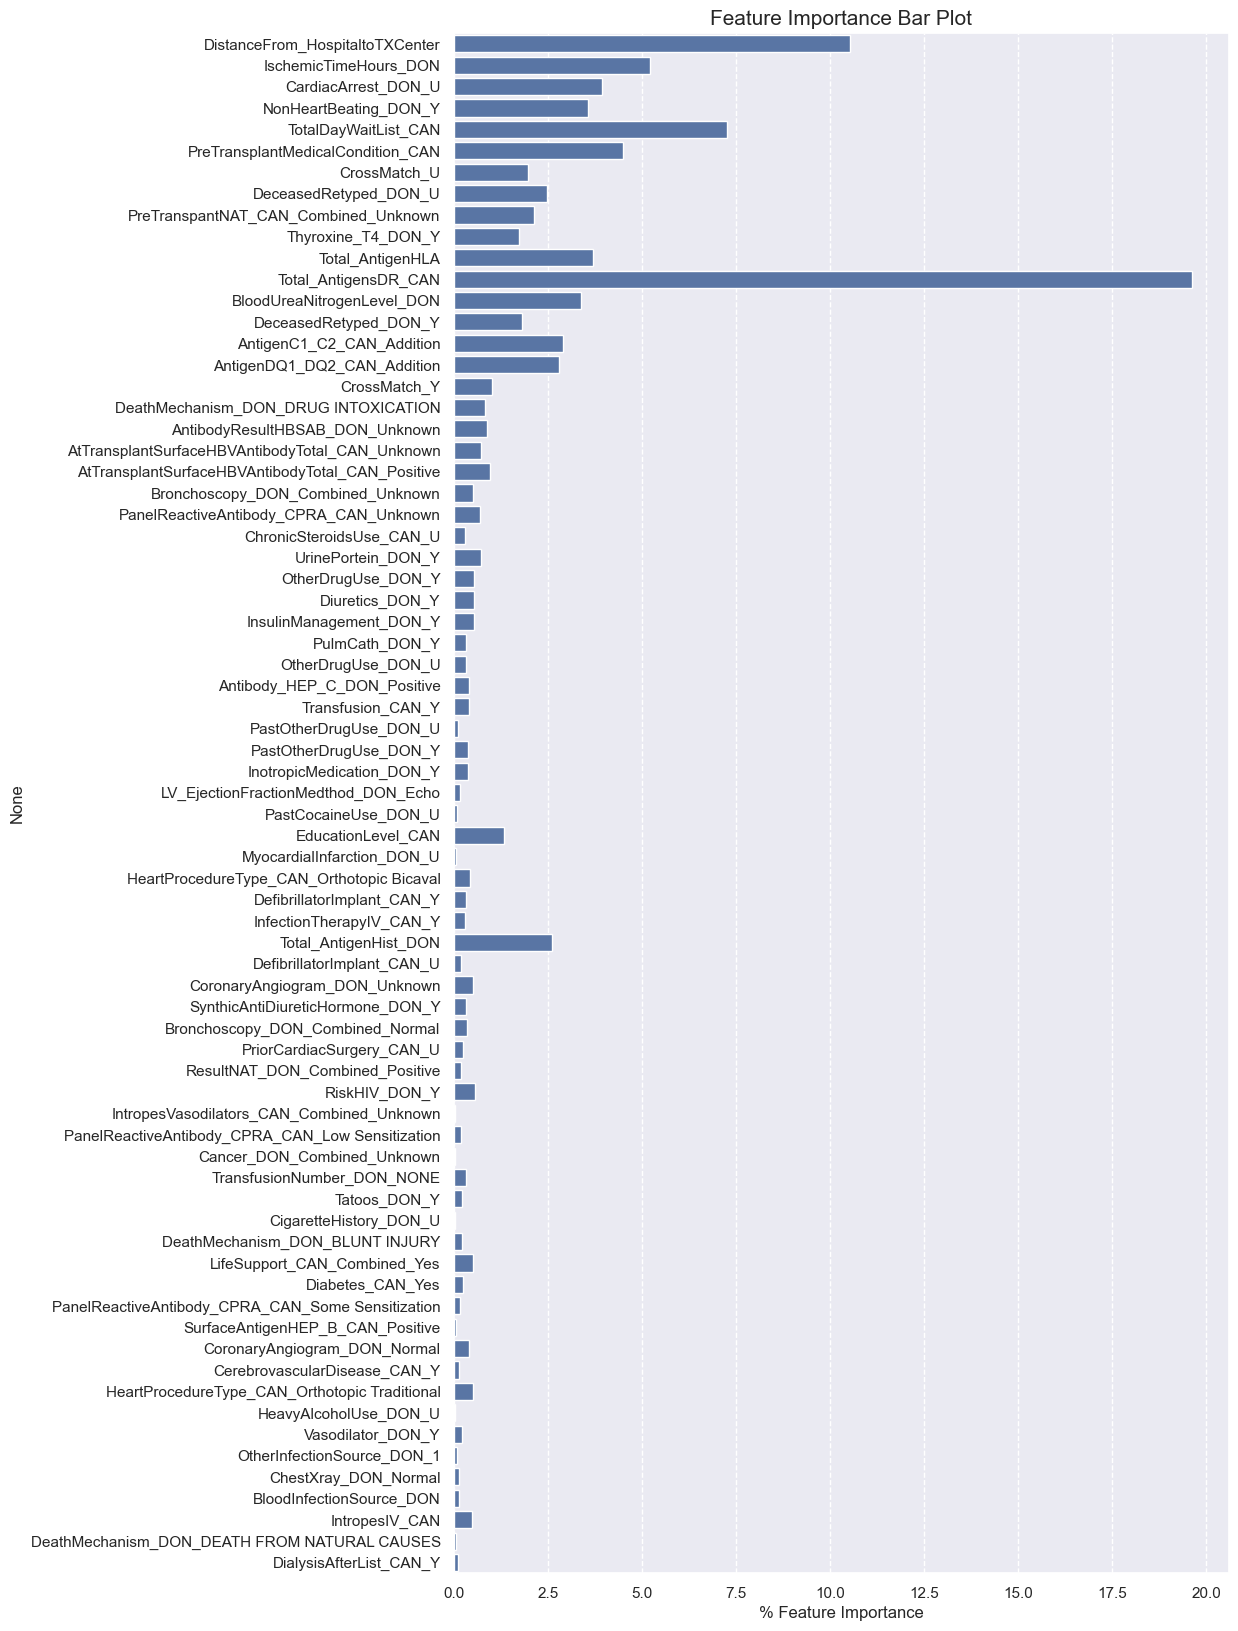

In [21]:
# plot
df_rfc = uf.plotFeatureImportance(rfc_CHI2_fit, X_train[selected],figsize=(10,20))

In [22]:
df_rfc.head(10)

,% Feature Importance
DistanceFrom_HospitaltoTXCenter,10.539389
IschemicTimeHours_DON,5.202866
CardiacArrest_DON_U,3.934950
NonHeartBeating_DON_Y,3.573148
TotalDayWaitList_CAN,7.263499
PreTransplantMedicalCondition_CAN,4.491347
CrossMatch_U,1.975158
DeceasedRetyped_DON_U,2.482089
PreTranspantNAT_CAN_Combined_Unknown,2.120619
Thyroxine_T4_DON_Y,1.737456


In [23]:
df_rfc.tail(10)

,% Feature Importance
CerebrovascularDisease_CAN_Y,0.147911
HeartProcedureType_CAN_Orthotopic Traditional,0.514902
HeavyAlcoholUse_DON_U,0.032596
Vasodilator_DON_Y,0.228447
OtherInfectionSource_DON_1,0.075262
ChestXray_DON_Normal,0.148305
BloodInfectionSource_DON,0.132801
IntropesIV_CAN,0.491499
DeathMechanism_DON_DEATH FROM NATURAL CAUSES,0.044577
DialysisAfterList_CAN_Y,0.113428


***** Classification Metrics for Training:
Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.69      0.72      4742
        True       0.72      0.79      0.75      4765

    accuracy                           0.74      9507
   macro avg       0.74      0.74      0.74      9507
weighted avg       0.74      0.74      0.74      9507



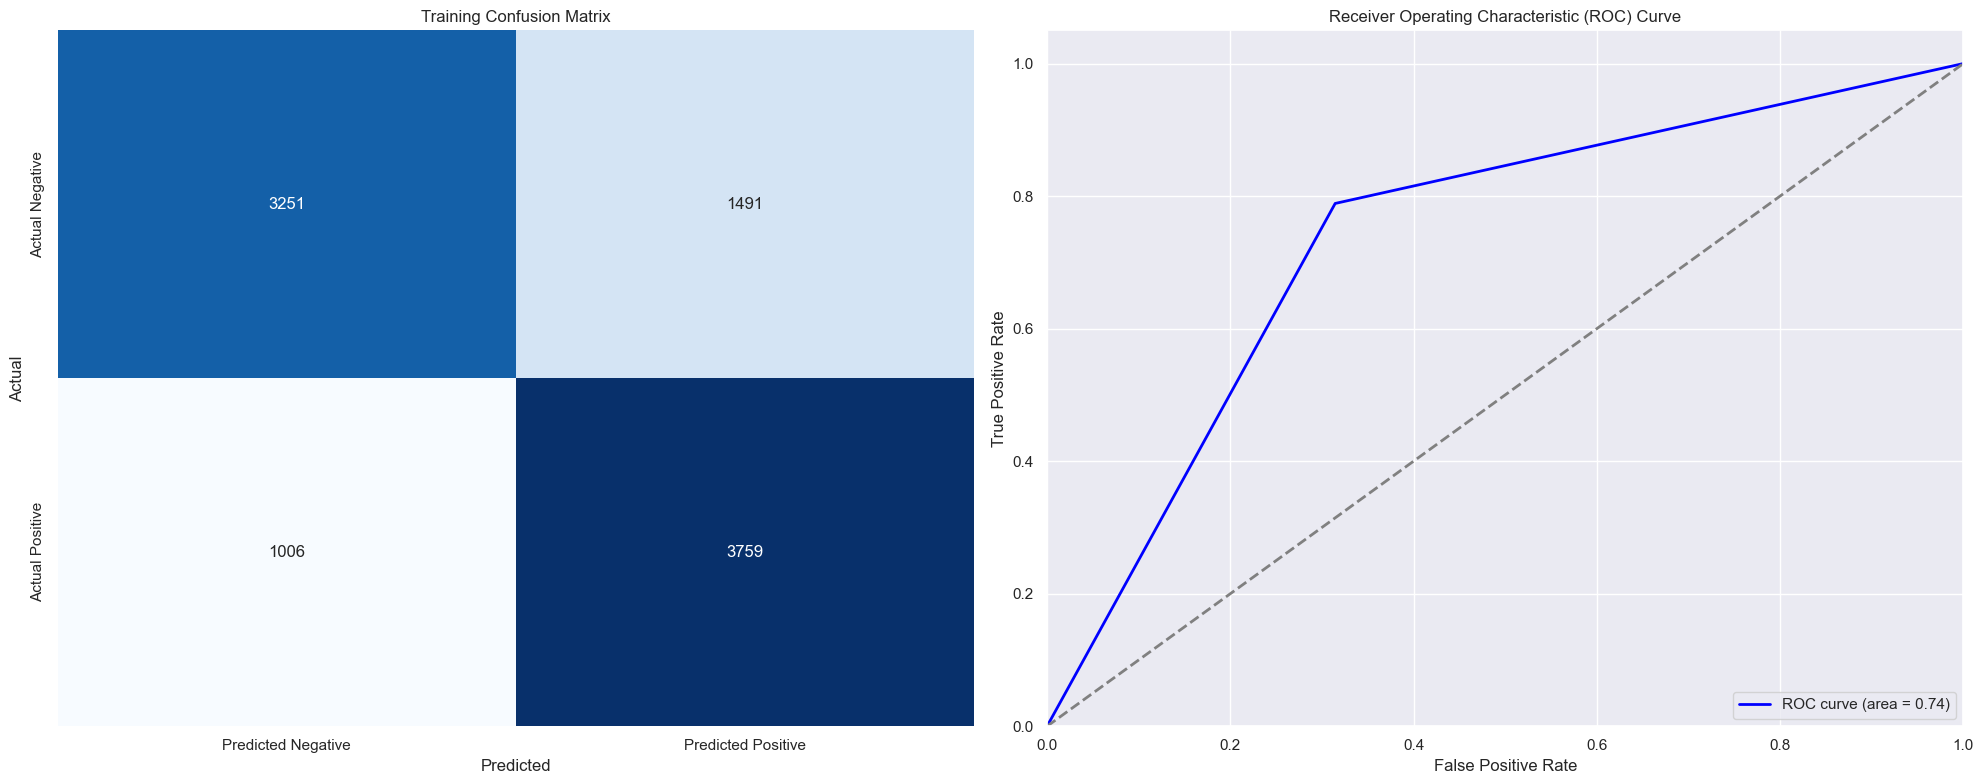

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,RandomForestClassifier,rfc_CHI2_fit,RandomForestClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Training,0.737351,0.788877,0.750674,0.670653,0.716,0.685576,0.737226


In [24]:
# initialize variables
Algorithm = 'RandomForestClassifier'
Desc = 'RandomForestClassifier - Scaled BayesSearchCV - Features Functions (f_classif)'
Model = 'rfc_CHI2_fit'
Type = 'Training'

# display
df_classfication = uf.ClassificationMatric(Algorithm, Model, Desc, rfc_CHI2_fit, X_train[selected], y_train, Type, metricDF=None)
df_classfication

***** Classification Metrics for Validation/Test:
Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.61      0.65      1186
        True       0.65      0.74      0.69      1191

    accuracy                           0.67      2377
   macro avg       0.67      0.67      0.67      2377
weighted avg       0.67      0.67      0.67      2377



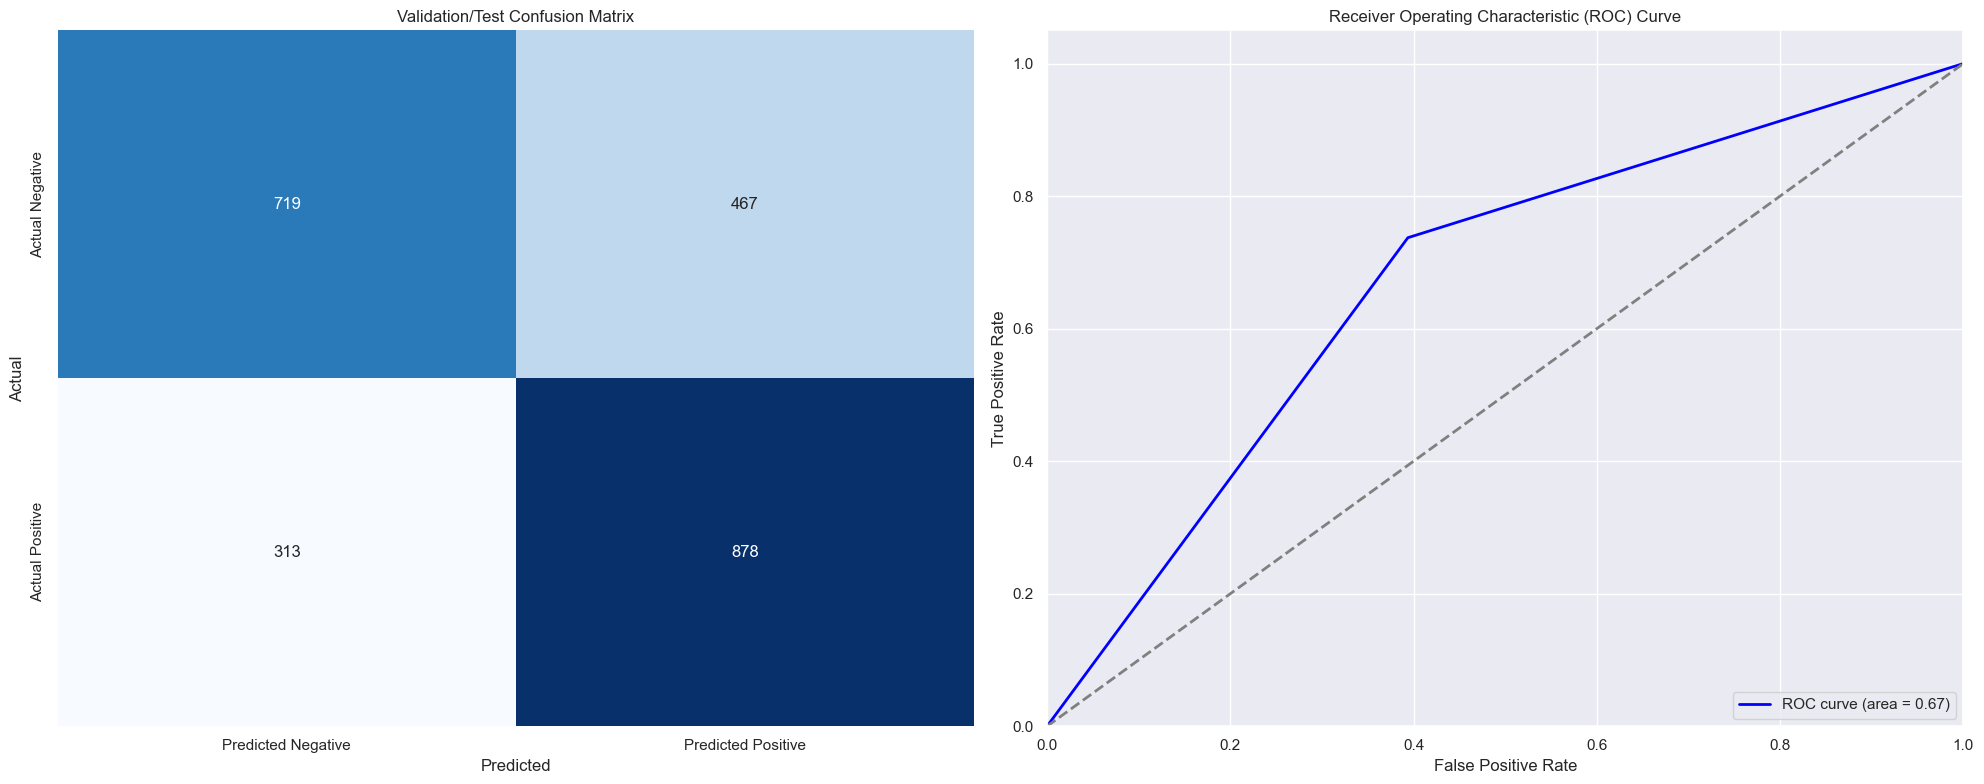

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,RandomForestClassifier,rfc_CHI2_fit,RandomForestClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Training,0.737351,0.788877,0.750674,0.670653,0.716000,0.685576,0.737226
1,RandomForestClassifier,rfc_CHI2_fit,RandomForestClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Validation,0.671855,0.737196,0.692429,0.612911,0.652788,0.606239,0.671718


In [25]:
# initialize variables
Type = 'Validation'

# display
df_classfication = uf.ClassificationMatric(Algorithm, Model, Desc, rfc_CHI2_fit, X_val[selected], y_val, Type, df_classfication)
df_classfication

#### XGBoost

In [26]:
# import library
from xgboost import XGBClassifier

# calculate the scale_pos_weight to adjust for class imbalance
# helps to counteract the imbalance by giving more weight to the minority class (usually the positive class in binary classification).
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# define the search space
search_space = {
    'n_estimators': uf.Integer(50, 500),
    'max_depth': uf.Integer(5, 10),
    'learning_rate': uf.Real(0.05, 1.0, prior='log-uniform'),
    'subsample':  uf.Real(0.1, 1.0, prior='log-uniform'),       # Subsample ratio
    'colsample_bytree': uf.Real(0.3, 1.0, prior='log-uniform'), # Feature sampling ratio
    'min_child_weight': uf.Integer(1, 50),                      # Minimum child weight
    'gamma': uf.Real(1e-5, 0.5, prior='log-uniform')            # Minimum loss reduction
}

# initialize Model with scale_pos_weight
xgb_param = {'scale_pos_weight': scale_pos_weight, 'n_jobs': -1,'random_state': RANDOM_STATE}

# instantiate XGB Classifier
model = XGBClassifier(**xgb_param)

# Bayesian Optimization
xgc_CHI2_fit = uf.BayesianOptimize(model, X_train[selected], y_train, search_space, 'f1',  nIter=64, nSplit=10, seed=RANDOM_STATE)

Best parameters found:  OrderedDict([('colsample_bytree', 0.6648604710063835), ('gamma', 4.202845568151468e-05), ('learning_rate', 0.05266752731559631), ('max_depth', 5), ('min_child_weight', 15), ('n_estimators', 255), ('subsample', 0.8192609981924142)])
Best accuracy score:  0.7063566550318822

Current Model Parameters:

 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6648604710063835, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=4.202845568151468e-05,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05266752731559631,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=15, missing=nan, monotone_constrai

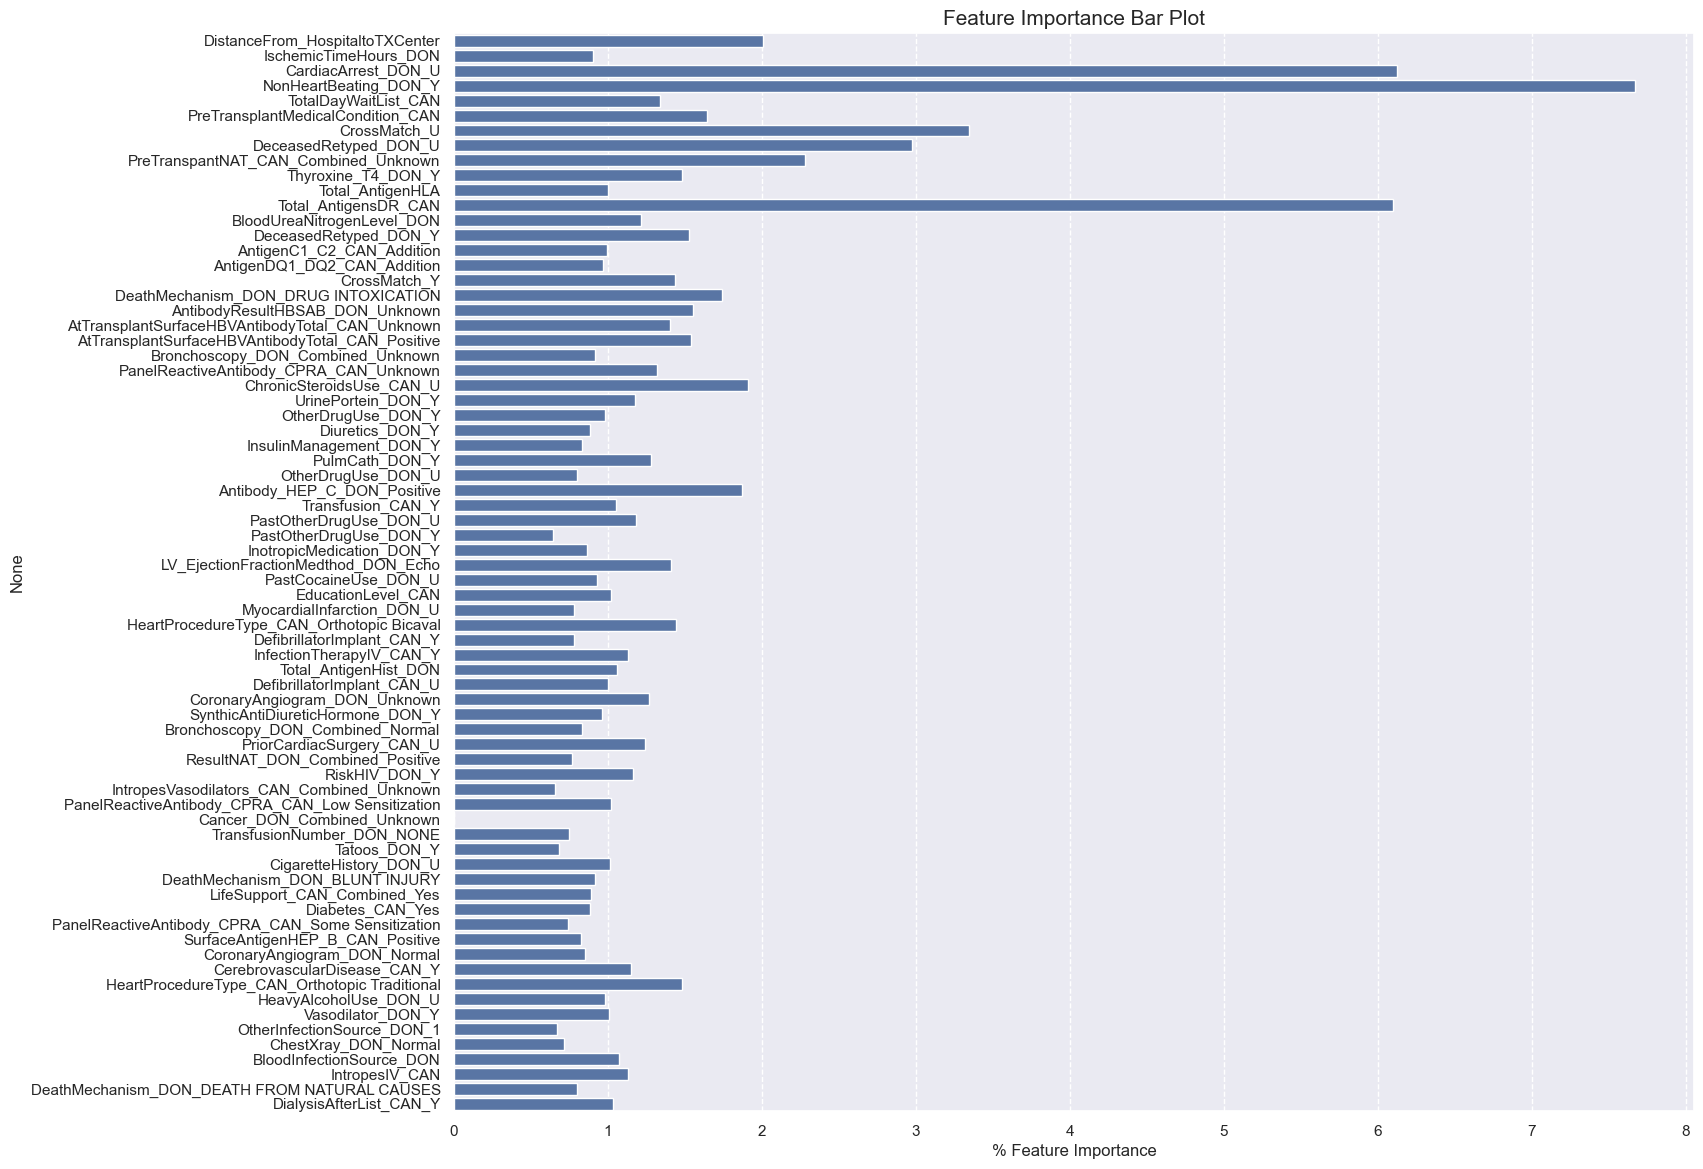

In [27]:
# plot
df_xgb = uf.plotFeatureImportance(xgc_CHI2_fit, X_train[selected], figsize=(16,14))

***** Classification Metrics for Training:
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.75      0.76      4742
        True       0.76      0.79      0.77      4765

    accuracy                           0.77      9507
   macro avg       0.77      0.77      0.77      9507
weighted avg       0.77      0.77      0.77      9507



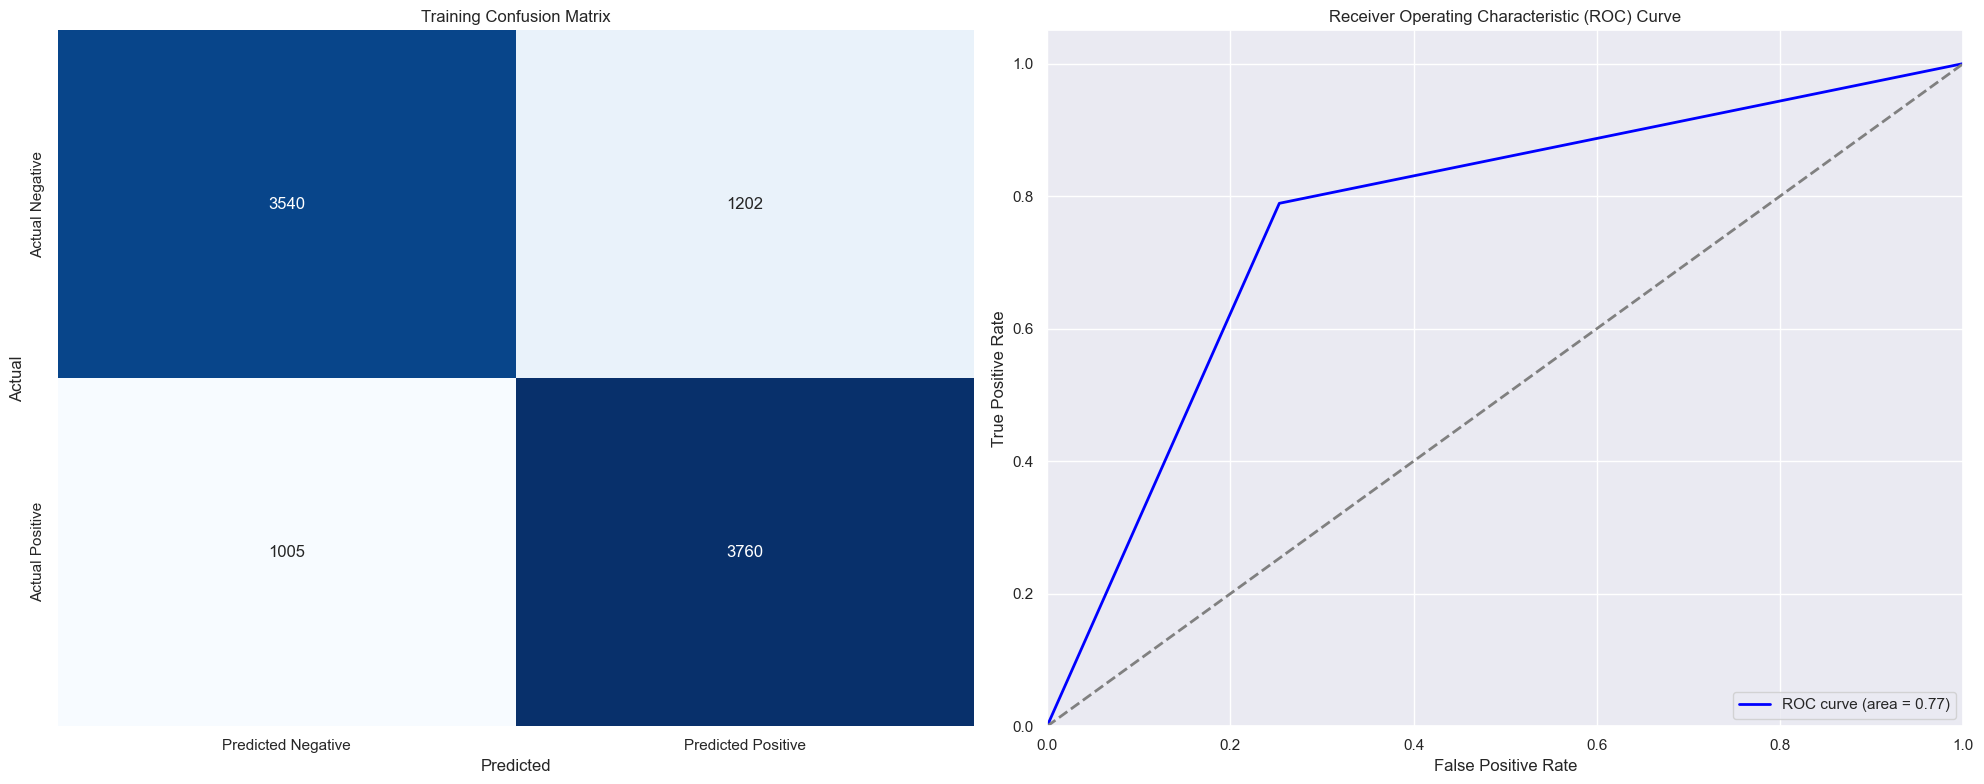

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,RandomForestClassifier,rfc_CHI2_fit,RandomForestClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Training,0.737351,0.788877,0.750674,0.670653,0.716000,0.685576,0.737226
1,RandomForestClassifier,rfc_CHI2_fit,RandomForestClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Validation,0.671855,0.737196,0.692429,0.612911,0.652788,0.606239,0.671718
2,XGBoostClassifier,xgc_CHI2_fit,XGBoostClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Training,0.767855,0.789087,0.773106,0.703649,0.757759,0.746520,0.767804


In [28]:
# initialize variables
Algorithm = 'XGBoostClassifier'
Desc = 'XGBoostClassifier - Scaled BayesSearchCV - Features Functions (f_classif)'
Model = 'xgc_CHI2_fit'
Type = 'Training'

# display
df_classfication = uf.ClassificationMatric(Algorithm, Model, Desc, xgc_CHI2_fit, X_train[selected], y_train, Type, df_classfication)
df_classfication

***** Classification Metrics for Validation/Test:
Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.68      0.69      1186
        True       0.69      0.72      0.70      1191

    accuracy                           0.70      2377
   macro avg       0.70      0.70      0.70      2377
weighted avg       0.70      0.70      0.70      2377



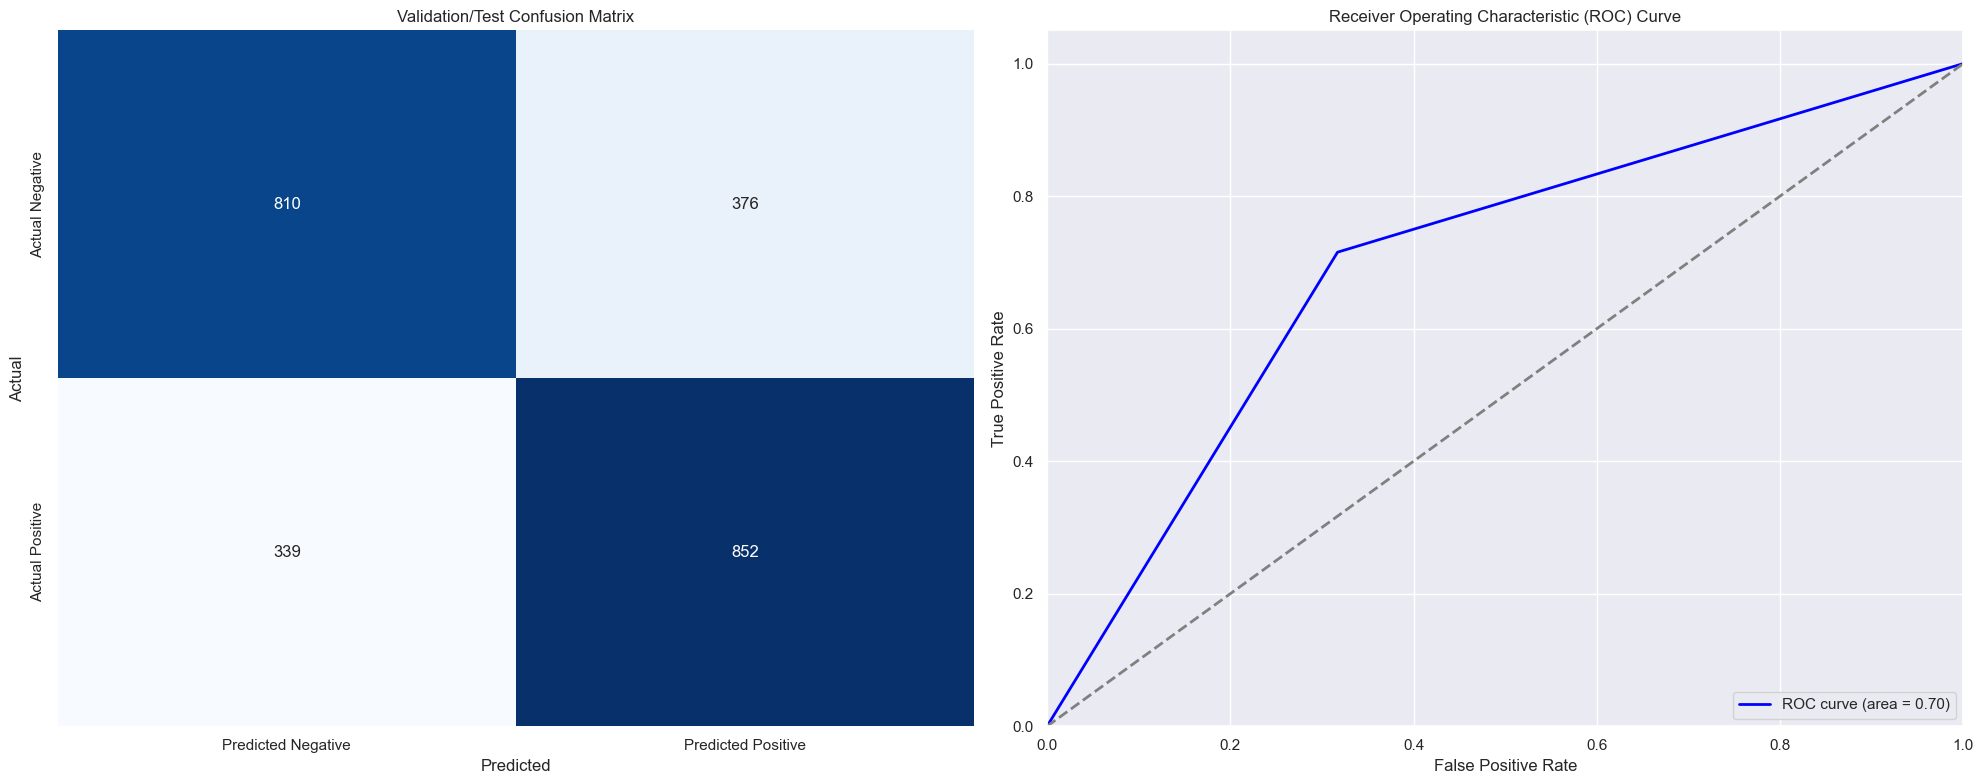

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,RandomForestClassifier,rfc_CHI2_fit,RandomForestClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Training,0.737351,0.788877,0.750674,0.670653,0.716000,0.685576,0.737226
1,RandomForestClassifier,rfc_CHI2_fit,RandomForestClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Validation,0.671855,0.737196,0.692429,0.612911,0.652788,0.606239,0.671718
2,XGBoostClassifier,xgc_CHI2_fit,XGBoostClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Training,0.767855,0.789087,0.773106,0.703649,0.757759,0.746520,0.767804
3,XGBoostClassifier,xgc_CHI2_fit,XGBoostClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Validation,0.699201,0.715365,0.704423,0.638945,0.693811,0.682968,0.699167


In [29]:
# initialize variables
Type = 'Validation'

# display
df_classfication = uf.ClassificationMatric(Algorithm, Model, Desc, xgc_CHI2_fit, X_val[selected], y_val, Type, df_classfication)
df_classfication

### Logistic Regression

In [39]:
# import library
from sklearn.linear_model import LogisticRegression

# define the parameter search space
search_space = {
    'C': uf.Real(0.01, 20, prior='log-uniform'),
    'l1_ratio': uf.Real(1e-5, 1, prior='log-uniform')
}

# Base Model
lrc_param = {'max_iter':10000, 'solver': 'saga', 'penalty': 'elasticnet', 'class_weight': class_weight_dict, 'n_jobs': -1, 'random_state': RANDOM_STATE}

# instantiate LogisticRegression Classifier
model = LogisticRegression(**lrc_param)

# Bayesian Optimization
lrc_CHI2_fit = uf.BayesianOptimize(model, X_train[selected], y_train, search_space, 'f1',  nIter=32, nSplit=5, seed=RANDOM_STATE)

Best parameters found:  OrderedDict([('C', 0.5134110246371612), ('l1_ratio', 0.9146552918202075)])
Best accuracy score:  0.6682672474931429

Current Model Parameters:

 LogisticRegression(C=0.5134110246371612,
                   class_weight={False: 1.002425137072965,
                                 True: 0.9975865687303253},
                   l1_ratio=0.9146552918202075, max_iter=10000, n_jobs=-1,
                   penalty='elasticnet', random_state=1776, solver='saga')


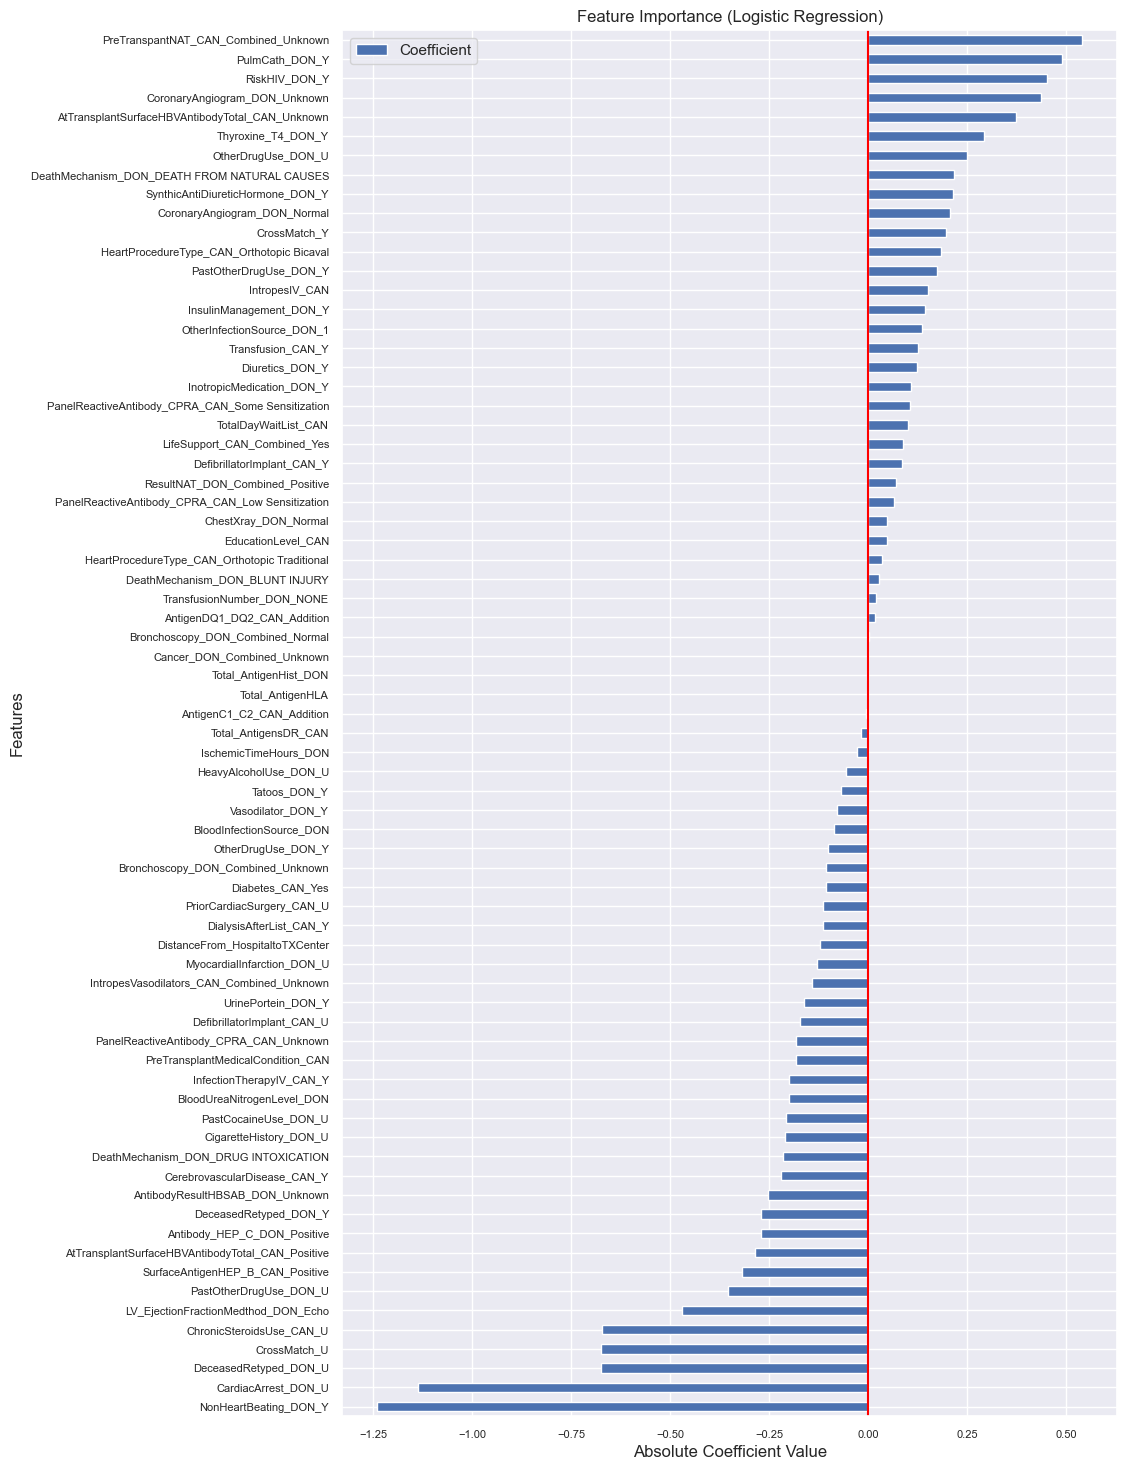

In [40]:
# feature importance & plot
lrc_df = uf.LogisticFeatureImportance(lrc_CHI2_fit, figsize=(10,18), fontsize=8)

In [41]:
lrc_df.head(10)

,Feature,Coefficient,Description,Odd Ratio,Percentage Change in Odds,Probability
0,NonHeartBeating_DON_Y,-1.239713,Decrease in the log-odds of the Positive Class,0.289467,-71.053267,0.224486
1,CardiacArrest_DON_U,-1.138424,Decrease in the log-odds of the Positive Class,0.320324,-67.967643,0.242610
2,DeceasedRetyped_DON_U,-0.674304,Decrease in the log-odds of the Positive Class,0.509511,-49.048890,0.337534
3,CrossMatch_U,-0.674304,Decrease in the log-odds of the Positive Class,0.509511,-49.048890,0.337534
4,ChronicSteroidsUse_CAN_U,-0.673767,Decrease in the log-odds of the Positive Class,0.509785,-49.021530,0.337654
5,LV_EjectionFractionMedthod_DON_Echo,-0.471461,Decrease in the log-odds of the Positive Class,0.624090,-37.591029,0.384270
6,PastOtherDrugUse_DON_U,-0.354554,Decrease in the log-odds of the Positive Class,0.701486,-29.851379,0.412279
7,SurfaceAntigenHEP_B_CAN_Positive,-0.318839,Decrease in the log-odds of the Positive Class,0.726992,-27.300769,0.420959
8,AtTransplantSurfaceHBVAntibodyTotal_CAN_Positive,-0.286050,Decrease in the log-odds of the Positive Class,0.751225,-24.877512,0.428971
9,Antibody_HEP_C_DON_Positive,-0.271695,Decrease in the log-odds of the Positive Class,0.762087,-23.791327,0.432491


In [42]:
lrc_df.tail(10)

,Feature,Coefficient,Description,Odd Ratio,Percentage Change in Odds,Probability
62,CoronaryAngiogram_DON_Normal,0.206870,Increase in the log-odds of the Positive Class,1.229823,22.982254,0.551534
63,SynthicAntiDiureticHormone_DON_Y,0.214742,Increase in the log-odds of the Positive Class,1.239542,23.954229,0.553480
64,DeathMechanism_DON_DEATH FROM NATURAL CAUSES,0.216257,Increase in the log-odds of the Positive Class,1.241422,24.142192,0.553855
65,OtherDrugUse_DON_U,0.249408,Increase in the log-odds of the Positive Class,1.283265,28.326539,0.562031
66,Thyroxine_T4_DON_Y,0.292716,Increase in the log-odds of the Positive Class,1.340063,34.006277,0.572661
67,AtTransplantSurfaceHBVAntibodyTotal_CAN_Unknown,0.372310,Increase in the log-odds of the Positive Class,1.451083,45.108326,0.592017
68,CoronaryAngiogram_DON_Unknown,0.435392,Increase in the log-odds of the Positive Class,1.545569,54.556876,0.607160
69,RiskHIV_DON_Y,0.451020,Increase in the log-odds of the Positive Class,1.569913,56.991293,0.610882
70,PulmCath_DON_Y,0.488357,Increase in the log-odds of the Positive Class,1.629636,62.963616,0.619719
71,PreTranspantNAT_CAN_Combined_Unknown,0.539839,Increase in the log-odds of the Positive Class,1.715731,71.573061,0.631775


***** Classification Metrics for Training:
Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.65      0.66      4742
        True       0.66      0.69      0.68      4765

    accuracy                           0.67      9507
   macro avg       0.67      0.67      0.67      9507
weighted avg       0.67      0.67      0.67      9507



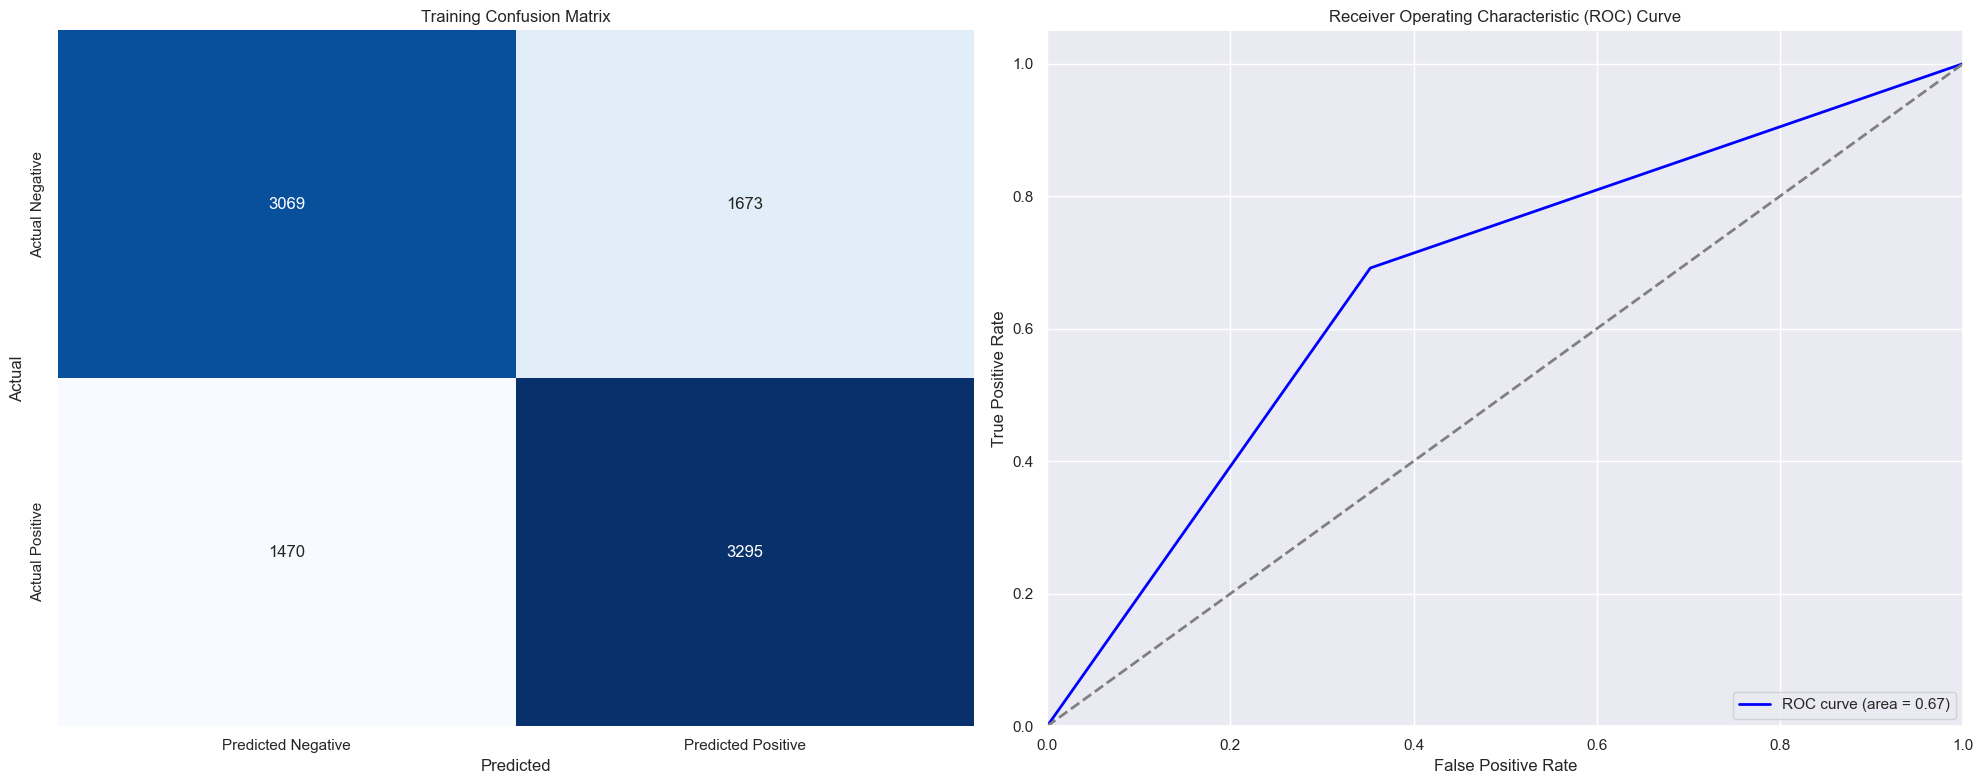

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,RandomForestClassifier,rfc_CHI2_fit,RandomForestClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Training,0.737351,0.788877,0.750674,0.670653,0.716000,0.685576,0.737226
1,RandomForestClassifier,rfc_CHI2_fit,RandomForestClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Validation,0.671855,0.737196,0.692429,0.612911,0.652788,0.606239,0.671718
2,XGBoostClassifier,xgc_CHI2_fit,XGBoostClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Training,0.767855,0.789087,0.773106,0.703649,0.757759,0.746520,0.767804
3,XGBoostClassifier,xgc_CHI2_fit,XGBoostClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Validation,0.699201,0.715365,0.704423,0.638945,0.693811,0.682968,0.699167
4,LogisticRegression,lrc_both_fit,LogisticRegression - Scaled BayesSearchCV - Features Functions (chi2 & f_classif),Training,0.669401,0.691501,0.677078,0.613257,0.663245,0.647195,0.669348


In [44]:
# initialize variables
Algorithm = 'LogisticRegression'
Desc = 'LogisticRegression - Scaled BayesSearchCV - Features Functions (chi2 & f_classif)'
Model = 'lrc_both_fit'
Type = 'Training'

# display
df_classfication = uf.ClassificationMatric(Algorithm, Model, Desc, lrc_CHI2_fit, X_train[selected], y_train, Type, df_classfication)
df_classfication

***** Classification Metrics for Validation/Test:
Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.65      0.66      1186
        True       0.66      0.68      0.67      1191

    accuracy                           0.66      2377
   macro avg       0.66      0.66      0.66      2377
weighted avg       0.66      0.66      0.66      2377



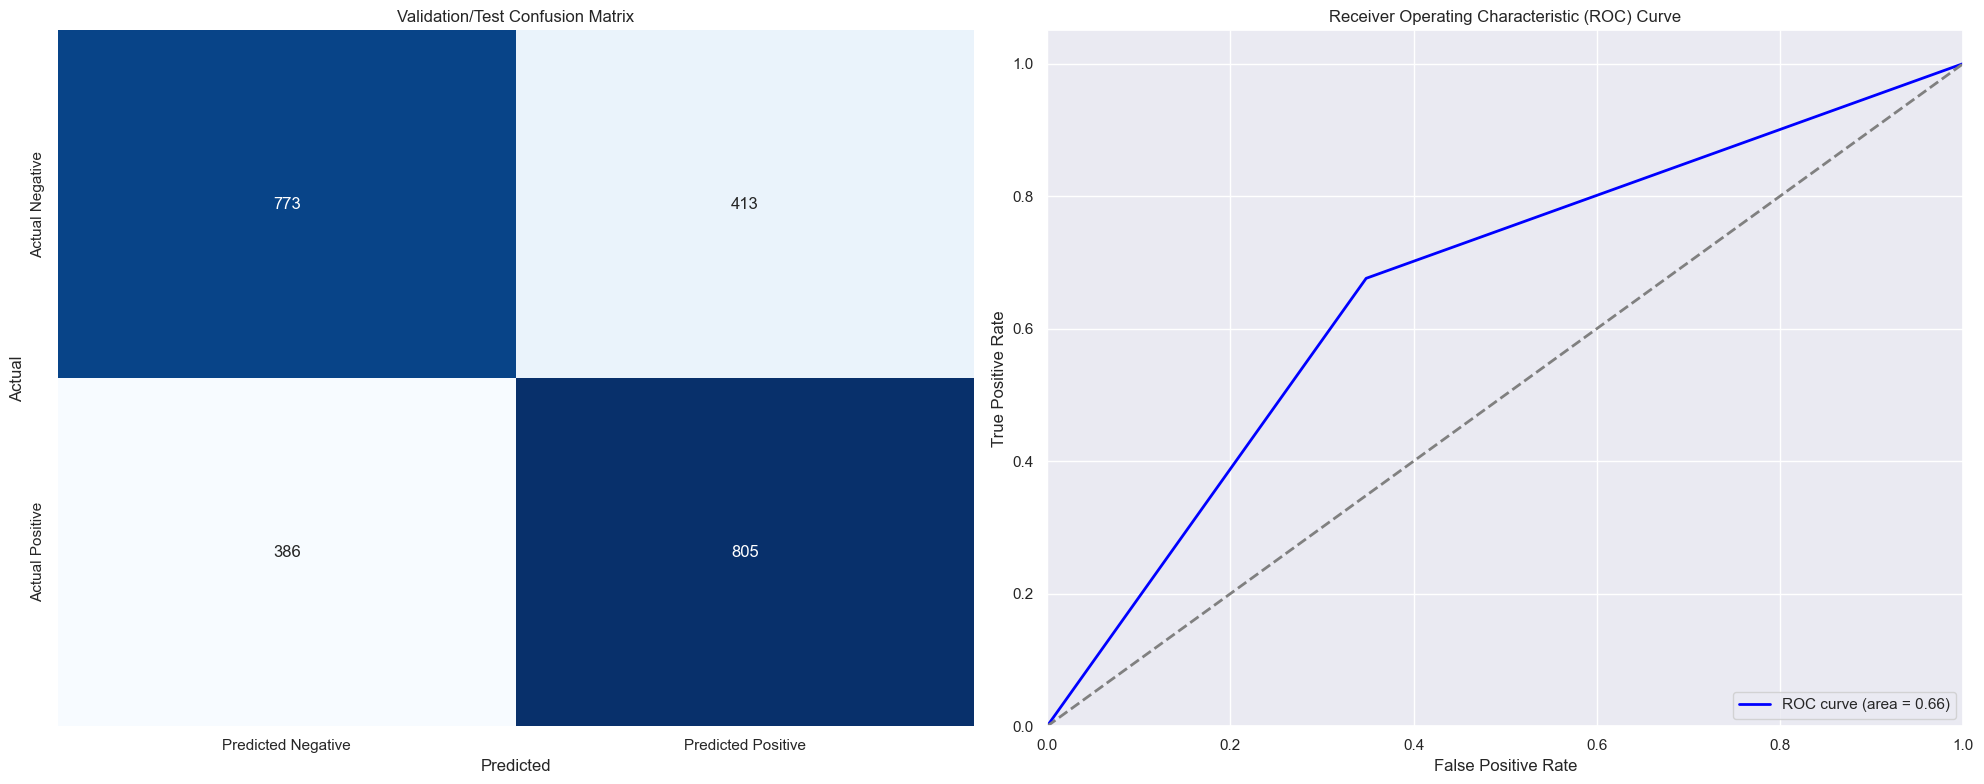

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,RandomForestClassifier,rfc_CHI2_fit,RandomForestClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Training,0.737351,0.788877,0.750674,0.670653,0.716000,0.685576,0.737226
1,RandomForestClassifier,rfc_CHI2_fit,RandomForestClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Validation,0.671855,0.737196,0.692429,0.612911,0.652788,0.606239,0.671718
2,XGBoostClassifier,xgc_CHI2_fit,XGBoostClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Training,0.767855,0.789087,0.773106,0.703649,0.757759,0.746520,0.767804
3,XGBoostClassifier,xgc_CHI2_fit,XGBoostClassifier - Scaled BayesSearchCV - Features Functions (f_classif),Validation,0.699201,0.715365,0.704423,0.638945,0.693811,0.682968,0.699167
4,LogisticRegression,lrc_both_fit,LogisticRegression - Scaled BayesSearchCV - Features Functions (chi2 & f_classif),Training,0.669401,0.691501,0.677078,0.613257,0.663245,0.647195,0.669348
5,LogisticRegression,lrc_both_fit,LogisticRegression - Scaled BayesSearchCV - Features Functions (chi2 & f_classif),Validation,0.663862,0.675903,0.668327,0.609107,0.660920,0.651771,0.663837


In [45]:
# initialize variables
Type = 'Validation'

# display
df_classfication = uf.ClassificationMatric(Algorithm, Model, Desc, lrc_CHI2_fit, X_val[selected], y_val, Type, df_classfication)
df_classfication

##### Metrics
- `Accuracy` is a metric used to evaluate the performance of a classification model. It measures the proportion of correct predictions out of the total predictions made.
- `Recall`, also known as `Sensitivity` or `True Positive Rate` (TPR), is a metric used to evaluate the performance of a classification model, particularly in situations where correctly identifying positive cases
- The `F1 score` is the harmonic mean of `precision` and `recall`. It ranges from 0 to 1, where 1 indicates the best possible performance.
- `Average Precision` calculates the area under the precision-recall curve by averaging precision values at increasing recall levels.
- `Precision` is a metric used to evaluate the accuracy of positive predictions in a classification model, particularly useful in binary classification tasks. It measures how many of the instances predicted as positive are actually positive.
- `Specificity` (also known as the `True Negative Rate`) is a metric used in binary classification to measure the model’s ability to correctly identify negative instances. It tells us the proportion of actual negatives that were correctly classified as negative by the model.
- The `ROC AUC score` is a performance metric for classification models, particularly useful for evaluating models in binary classification tasks. It combines Receiver Operating Characteristic (ROC) curve analysis with the Area Under the Curve (AUC).
    -  The area under the ROC curve (AUC) provides a single value summary of the model's ability to discriminate between positive and negative classes. It ranges from 0 to 1, where:
    - AUC = 1: Perfect classifier (it perfectly separates positive and negative classes).
    - AUC = 0.5: Model has no discrimination ability (equivalent to random guessing).
    - AUC < 0.5: The model performs worse than random guessing (this suggests the model may need to be inverted or there’s an issue with the model).